In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import sys
sys.path.append('../scripts')

import matplotlib.pyplot as plt
import numpy as np

from get_vmc import get_vmc

In [14]:
vmc_dict = get_vmc(wind_velocity=1)

VMC for v_wind=1 saved at /Users/lucasmrdt/Documents/Internship/2023/sailboat-gym/scripts/../output/pkl/vmc_(v_wind_1).pkl.


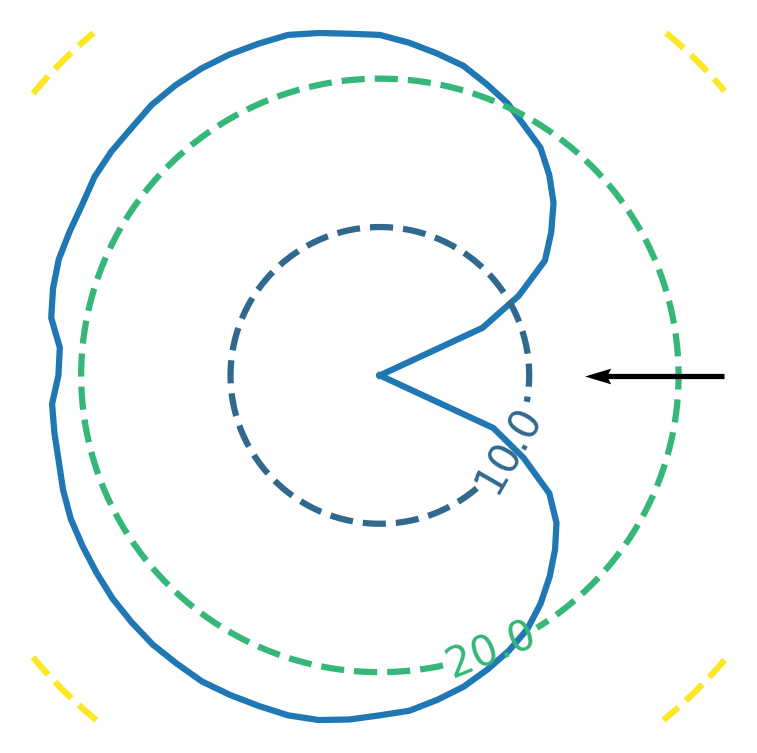

In [25]:
thetas = np.array(list(vmc_dict.keys()))
vmc = np.array(list(vmc_dict.values()))

plt.subplots(figsize=(3, 3), dpi=300)

# plot VMC
init_coord = np.array([0, 0])
coords = init_coord + \
    np.array([np.cos(thetas), np.sin(thetas)]).T * \
    vmc[:, None] * 100  # meters to cm
plt.plot(coords[:, 0], coords[:, 1])

# plot velocities levels
def fmt(x):
    s = f'{x:.1f}'
    return rf'{s}' if plt.rcParams['text.usetex'] else f'{s}'

space = np.linspace(coords.min(), coords.max(), 100)
X, Y = np.meshgrid(space, space)
Z = (X**2 + Y**2)**0.5  # distance from origin
CS = plt.contour(X, Y, Z,
                    levels=np.arange(0, max(1, Z.max()), 10), linestyles='dashed')
plt.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)

# plot wind
wind_coords = np.array([1, 0])
x_right = coords.max()
y_mid = (coords[:, 1].max() + coords[:, 1].min()) / 2
plt.quiver(x_right, y_mid, *-wind_coords, color='k', scale=5, zorder=10)

plt.xlim(coords.min()-.2, coords.max()+.2)
plt.ylim(coords.min()-.2, coords.max()+.2)
plt.axis('off');